In [2]:
import numpy as np
import matplotlib.pyplot as plt

from meccomp_lib import *


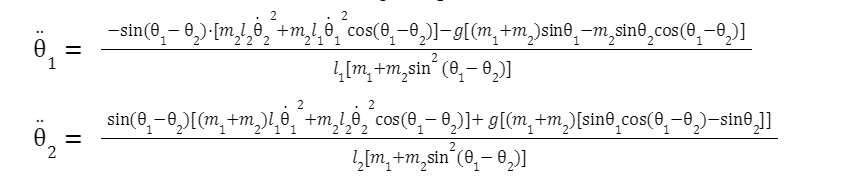

In [8]:
class RK4:
    def __init__(self, step:float=0.05, n_steps:int = 1000):
        self.step = step
        self.n_steps = n_steps
        self.system = System(step=step)
        
    def simul(self):
        self.system.reset()
        for time_step in range(self.n_steps):
            current_state = self.system.get_current_state()
            theta_1 = current_state['theta_1']
            theta_1_dot = current_state['theta_1_dot']
            next_theta_1 = theta_1 + self.step*theta_1_dot
            next_theta_1_dot_dot = self.system.theta_1_dot_dot(**current_state)
            next_theta_1_dot = theta_1_dot + self.step*next_theta_1_dot_dot
            
            theta_2 = current_state['theta_2']
            theta_2_dot = current_state['theta_2_dot']
            next_theta_2 = theta_2 + self.step*theta_2_dot
            next_theta_2_dot_dot = self.system.theta_2_dot_dot(**current_state)
            next_theta_2_dot = theta_2_dot + self.step*next_theta_2_dot_dot
            
            next_state =[next_theta_1, next_theta_1_dot, next_theta_1_dot_dot, 
                         next_theta_2, next_theta_2_dot, next_theta_2_dot_dot]
            self.system.insert_state(next_state)
            
    def plot_results(self):        
        time_vector = np.arange(0, self.step*(self.n_steps+1), self.step)
        scalar_states = self.system.retrieve_scalar_states()
        scalar_states = np.array(scalar_states).reshape(self.n_steps+1,12)
        x_1_pos = scalar_states[:,0]
        y_1_pos = scalar_states[:,1]
        x_1_dot = scalar_states[:,2]
        y_1_dot = scalar_states[:,3]
        x_1_dot_dot = scalar_states[:,4]
        y_1_dot_dot = scalar_states[:,5]
        x_2_pos = scalar_states[:,6]
        y_2_pos = scalar_states[:,7]
        x_2_dot = scalar_states[:,8]
        y_2_dot = scalar_states[:,9]
        x_2_dot_dot = scalar_states[:,10]
        y_2_dot_dot = scalar_states[:,11]
        
        fig, axs = plt.subplots(6, 2, figsize=(10, 20))
        
        axs[0, 0].plot(time_vector, x_1_pos)
        axs[0, 0].set_title(f'Position in x of mass 1')
        axs[0, 1].plot(time_vector, y_1_pos)
        axs[0, 1].set_title(f'Position in y of mass 1')
        axs[1, 0].plot(time_vector, x_1_dot)
        axs[1, 0].set_title(f'Velocity in x of mass 1')
        axs[1, 1].plot(time_vector, y_1_dot)
        axs[1, 1].set_title(f'Velocity in y of mass 1')
        axs[2, 0].plot(time_vector, x_1_dot_dot)
        axs[2, 0].set_title(f'Aceleration in x of mass 1')
        axs[2, 1].plot(time_vector, y_1_dot_dot)
        axs[2, 1].set_title(f'Acceleration in y of mass 1')
        axs[3, 0].plot(time_vector, x_2_pos)
        axs[3, 0].set_title(f'Position in x of mass 2')
        axs[3, 1].plot(time_vector, y_2_pos)
        axs[3, 1].set_title(f'Position in y of mass 2')
        axs[4, 0].plot(time_vector, x_2_dot)
        axs[4, 0].set_title(f'Velocity in x of mass 2')
        axs[4, 1].plot(time_vector, y_2_dot)
        axs[4, 1].set_title(f'Velocity in y of mass 2')
        axs[5, 0].plot(time_vector, x_2_dot_dot)
        axs[5, 0].set_title(f'Aceleration in x of mass 2')
        axs[5, 1].plot(time_vector, y_2_dot_dot)
        axs[5, 1].set_title(f'Acceleration in y of mass 2')
        plt.tight_layout()
        plt.show()

        
rk = RK4()

rk.simul()

<bound method RK4.simul of <__main__.RK4 object at 0x00000219586F5C10>>

In [7]:
def simul(self):
    self.system.reset()
    for time_step in range(self.n_steps):
        current_state = self.system.get_current_state()
        theta_1 = current_state['theta_1']
        theta_1_dot = current_state['theta_1_dot']
        next_theta_1 = theta_1 + self.step*theta_1_dot
        next_theta_1_dot_dot = self.system.theta_1_dot_dot(**current_state)
        next_theta_1_dot = theta_1_dot + self.step*next_theta_1_dot_dot
        
        theta_2 = current_state['theta_2']
        theta_2_dot = current_state['theta_2_dot']
        next_theta_2 = theta_2 + self.step*theta_2_dot
        next_theta_2_dot_dot = self.system.theta_2_dot_dot(**current_state)
        next_theta_2_dot = theta_2_dot + self.step*next_theta_2_dot_dot
        
        next_state =[next_theta_1, next_theta_1_dot, next_theta_1_dot_dot, 
                        next_theta_2, next_theta_2_dot, next_theta_2_dot_dot]
        self.system.insert_state(next_state)
        
simul(rk)
            